In [1]:
# loading the normal package and the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df_1 = pd.read_csv(r"C:\Users\Asus\Box\CS_590_Projects\dataWithWeather.csv")
df_2 = pd.read_csv(r"C:\Users\Asus\Box\CS_590_Projects\dataWithCommunityInfo.csv")

In [2]:
df_2.shape[0]

3000000

In [3]:
df_1 = df_1.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
df_2 = df_2.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis = 1)

In [4]:
pd.set_option('display.max_columns', None)

df_2.head()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start UTC,Trip Start Chicago,Trip End UTC,Trip End Chicago,Date,Hour,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),Pickup Community Name,PopPickup,IncomePickup,CarpoolPerCommPickup,Dropoff Community Name,PopDropoff,IncomeDropoff,CarpoolPerCommDropoff
0,03/24/2019 10:30:00 AM,03/24/2019 10:45:00 AM,790.0,5.6,NaN,NaN,48.0,53.0,10.0,0.0,2.55,12.55,False,1,41.729676,-87.572717,POINT (-87.5727171342 41.7296764229),41.673820,-87.635740,POINT (-87.6357397768 41.6738199043),2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24 10:45:00+00:00,2019-03-24 05:45:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Calumet Heights,13088.0,35883.58973,0.087571,West Pullman,26104.0,22615.25200,0.132105
1,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,664.0,5.8,1.703183e+10,1.703108e+10,3.0,8.0,10.0,2.0,2.55,14.55,False,1,41.958056,-87.660389,POINT (-87.6603894557 41.958055933),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Uptown,57182.0,42111.65248,0.038842,Near North Side,105481.0,105016.51420,0.028290
2,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,1034.0,4.6,NaN,NaN,19.0,24.0,7.5,0.0,0.00,7.50,True,1,41.927261,-87.765502,POINT (-87.7655016086 41.9272609555),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Belmont Cragin,78116.0,21611.65496,0.132300,West Town,87781.0,68810.35002,0.048778
3,03/24/2019 10:30:00 AM,03/24/2019 11:00:00 AM,2061.0,17.6,1.703108e+10,1.703198e+10,8.0,76.0,25.0,5.0,7.55,37.55,False,1,41.907520,-87.626659,POINT (-87.6266589003 41.9075200747),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24 11:00:00+00:00,2019-03-24 06:00:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Near North Side,105481.0,105016.51420,0.028290,O'Hare,13418.0,35578.00231,0.087412
4,03/24/2019 10:15:00 AM,03/24/2019 10:15:00 AM,503.0,1.2,1.703108e+10,1.703108e+10,8.0,8.0,5.0,0.0,2.55,7.55,False,1,41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),41.905858,-87.630865,POINT (-87.6308650266 41.9058577688),2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Near North Side,105481.0,105016.51420,0.028290,Near North Side,105481.0,105016.51420,0.028290


In [5]:
from datetime import datetime
df_2['Date2'] = pd.to_datetime(df_2['Date'], format='%Y/%m/%d')

In [6]:
df_2['Tip_percent_PerRide'] = (df_2['Tip']/(df_2['Fare'] + df_2['Additional Charges']))*100
df_2['count'] = 1
df_2['Tipped'] = (df_2['Tip'] > 0)

In [7]:
df_2.head()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start UTC,Trip Start Chicago,Trip End UTC,Trip End Chicago,Date,Hour,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),Pickup Community Name,PopPickup,IncomePickup,CarpoolPerCommPickup,Dropoff Community Name,PopDropoff,IncomeDropoff,CarpoolPerCommDropoff,Date2,Tip_percent_PerRide,count,Tipped
0,03/24/2019 10:30:00 AM,03/24/2019 10:45:00 AM,790.0,5.6,NaN,NaN,48.0,53.0,10.0,0.0,2.55,12.55,False,1,41.729676,-87.572717,POINT (-87.5727171342 41.7296764229),41.673820,-87.635740,POINT (-87.6357397768 41.6738199043),2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24 10:45:00+00:00,2019-03-24 05:45:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Calumet Heights,13088.0,35883.58973,0.087571,West Pullman,26104.0,22615.25200,0.132105,2019-03-24,0.000000,1,False
1,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,664.0,5.8,1.703183e+10,1.703108e+10,3.0,8.0,10.0,2.0,2.55,14.55,False,1,41.958056,-87.660389,POINT (-87.6603894557 41.958055933),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Uptown,57182.0,42111.65248,0.038842,Near North Side,105481.0,105016.51420,0.028290,2019-03-24,15.936255,1,True
2,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,1034.0,4.6,NaN,NaN,19.0,24.0,7.5,0.0,0.00,7.50,True,1,41.927261,-87.765502,POINT (-87.7655016086 41.9272609555),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Belmont Cragin,78116.0,21611.65496,0.132300,West Town,87781.0,68810.35002,0.048778,2019-03-24,0.000000,1,False
3,03/24/2019 10:30:00 AM,03/24/2019 11:00:00 AM,2061.0,17.6,1.703108e+10,1.703198e+10,8.0,76.0,25.0,5.0,7.55,37.55,False,1,41.907520,-87.626659,POINT (-87.6266589003 41.9075200747),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24 11:00:00+00:00,2019-03-24 06:00:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Near North Side,105481.0,105016.51420,0.028290,O'Hare,13418.0,35578.00231,0.087412,2019-03-24,15.360983,1,True
4,03/24/2019 10:15:00 AM,03/24/2019 10:15:00 AM,503.0,1.2,1.703108e+10,1.703108e+10,8.0,8.0,5.0,0.0,2.55,7.55,False,1,41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),41.905858,-87.630865,POINT (-87.6308650266 41.9058577688),2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Near North Side,105481.0,105016.51420,0.028290,Near North Side,105481.0,105016.51420,0.028290,2019-03-24,0.000000,1,False


In [8]:
df_2.isna().sum()

Trip Start Timestamp                0
Trip End Timestamp                  0
Trip Seconds                     2233
Trip Miles                         68
Pickup Census Tract           1166086
Dropoff Census Tract          1175456
Pickup Community Area          220344
Dropoff Community Area         239458
Fare                             1508
Tip                              1507
Additional Charges               1509
Trip Total                       1509
Shared Trip Authorized              0
Trips Pooled                        0
Pickup Centroid Latitude       215874
Pickup Centroid Longitude      215874
Pickup Centroid Location       215874
Dropoff Centroid Latitude      235372
Dropoff Centroid Longitude     235372
Dropoff Centroid Location      235372
Trip Start UTC                      0
Trip Start Chicago                  0
Trip End UTC                        0
Trip End Chicago                    0
Date                                0
Hour                                0
time        

In [9]:
# Checking the number of NA. Some minor absence from Tip, Trip Miles, and Trip seconds. We're deleting them. (around 3000 obs, or 0.1%)
df = df_2.dropna(subset=['Trip Seconds', 'Tip', 'Trip Miles', 'Fare', 'Tip_percent_PerRide','Trip Total'])

# Also dropping some stuff where values doesnt make sense
df = df[df['Tip_percent_PerRide'] < 1000]
df = df[df['Trip Seconds'] != 0]
df = df[(df['Trip Miles'] != 0) & (df['Trip Miles'] > 0.1)]

# Extracting the weekdays
df['weekday'] = df['Date2'].dt.weekday

In [10]:
df['traffic_condition'] = (df['Trip Miles']/df['Trip Seconds'])
df = df[df['traffic_condition'] <= 0.04]

df['traffic_condition_interval'] = pd.cut(df['traffic_condition'], 
                            bins=[ 0, 0.0025, 0.005, 0.0085, 0.0125, 0.0165, max(df['traffic_condition'])],
                             labels=["Very high traffic", "high traffic", "high-avg traffic", "avg traffic", 
                                     "light traffic","no traffic"])

In [11]:
df.head()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start UTC,Trip Start Chicago,Trip End UTC,Trip End Chicago,Date,Hour,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),Pickup Community Name,PopPickup,IncomePickup,CarpoolPerCommPickup,Dropoff Community Name,PopDropoff,IncomeDropoff,CarpoolPerCommDropoff,Date2,Tip_percent_PerRide,count,Tipped,weekday,traffic_condition,traffic_condition_interval
0,03/24/2019 10:30:00 AM,03/24/2019 10:45:00 AM,790.0,5.6,NaN,NaN,48.0,53.0,10.0,0.0,2.55,12.55,False,1,41.729676,-87.572717,POINT (-87.5727171342 41.7296764229),41.673820,-87.635740,POINT (-87.6357397768 41.6738199043),2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24 10:45:00+00:00,2019-03-24 05:45:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Calumet Heights,13088.0,35883.58973,0.087571,West Pullman,26104.0,22615.25200,0.132105,2019-03-24,0.000000,1,False,6,0.007089,high-avg traffic
1,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,664.0,5.8,1.703183e+10,1.703108e+10,3.0,8.0,10.0,2.0,2.55,14.55,False,1,41.958056,-87.660389,POINT (-87.6603894557 41.958055933),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Uptown,57182.0,42111.65248,0.038842,Near North Side,105481.0,105016.51420,0.028290,2019-03-24,15.936255,1,True,6,0.008735,avg traffic
2,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,1034.0,4.6,NaN,NaN,19.0,24.0,7.5,0.0,0.00,7.50,True,1,41.927261,-87.765502,POINT (-87.7655016086 41.9272609555),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Belmont Cragin,78116.0,21611.65496,0.132300,West Town,87781.0,68810.35002,0.048778,2019-03-24,0.000000,1,False,6,0.004449,high traffic
3,03/24/2019 10:30:00 AM,03/24/2019 11:00:00 AM,2061.0,17.6,1.703108e+10,1.703198e+10,8.0,76.0,25.0,5.0,7.55,37.55,False,1,41.907520,-87.626659,POINT (-87.6266589003 41.9075200747),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24 11:00:00+00:00,2019-03-24 06:00:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Near North Side,105481.0,105016.51420,0.028290,O'Hare,13418.0,35578.00231,0.087412,2019-03-24,15.360983,1,True,6,0.008540,avg traffic
4,03/24/2019 10:15:00 AM,03/24/2019 10:15:00 AM,503.0,1.2,1.703108e+10,1.703108e+10,8.0,8.0,5.0,0.0,2.55,7.55,False,1,41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),41.905858,-87.630865,POINT (-87.6308650266 41.9058577688),2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24 10:15:00+00:00,2019-03-24 05:15:00-05:00,2019-03-24,5,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209,Near North Side,105481.0,105016.51420,0.028290,Near North Side,105481.0,105016.51420,0.028290,2019-03-24,0.000000,1,False,6,0.002386,Very high traffic


In [12]:
df.shape[0]

2993711

In [13]:
df.shape[0]/3000000

0.9979036666666666

### Percentage of the total riders who tip

In [14]:
(sum(df['Tipped'] == True)/df.shape[0] )*100 # Only 20.07% actually give tip

20.081163479039894

In [15]:
df['Tip_percent_interval'] = pd.cut(df['Tip_percent_PerRide'], 
                            bins=[-1, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, max(df['Tip_percent_PerRide'])])
plot = df['Tip_percent_interval'].value_counts().reset_index()
plot = plot.sort_values('index').reset_index(drop=True)
plot['index'] = plot['index'].astype(str)
plot = plot.replace("(-1.0, 0.0]", "0")
plot = plot.replace("(50.0, 746.269]", "50+")

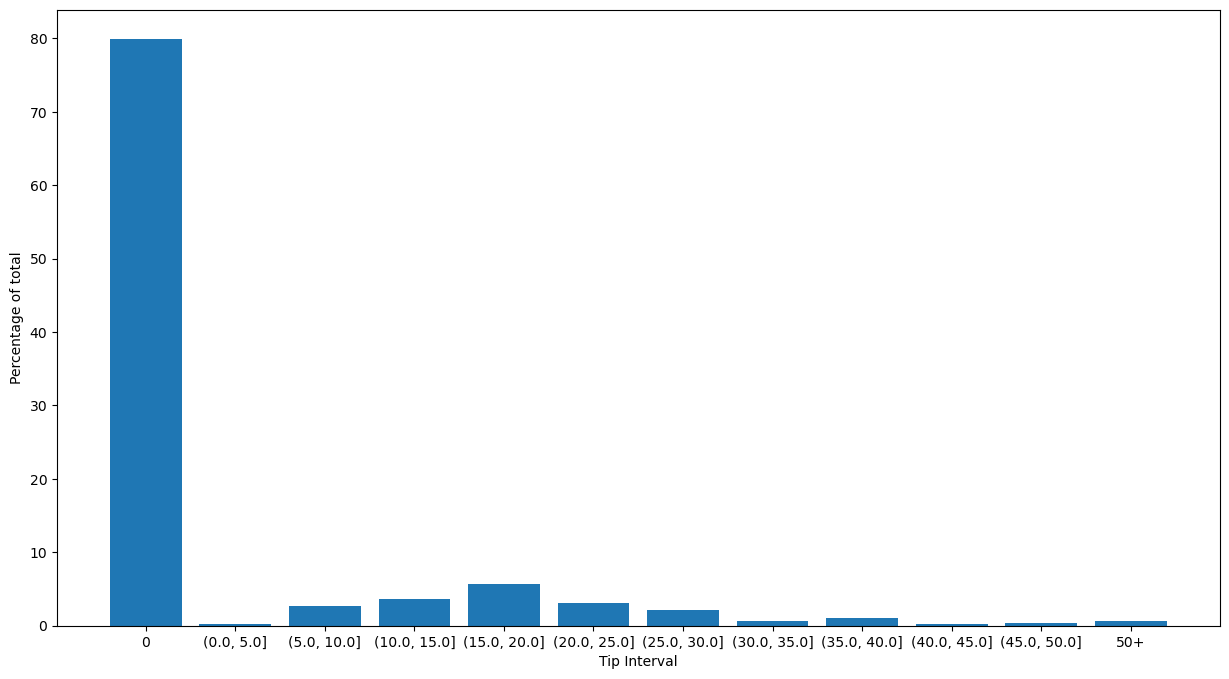

In [16]:
#Percentage of tipping interval in Chicago taxi data

plt.figure(figsize=(15, 8))

plt.bar(plot['index'], (plot['Tip_percent_interval']/df.shape[0])*100)
plt.ylabel('Percentage of total')
plt.xlabel('Tip Interval')
plt.show()

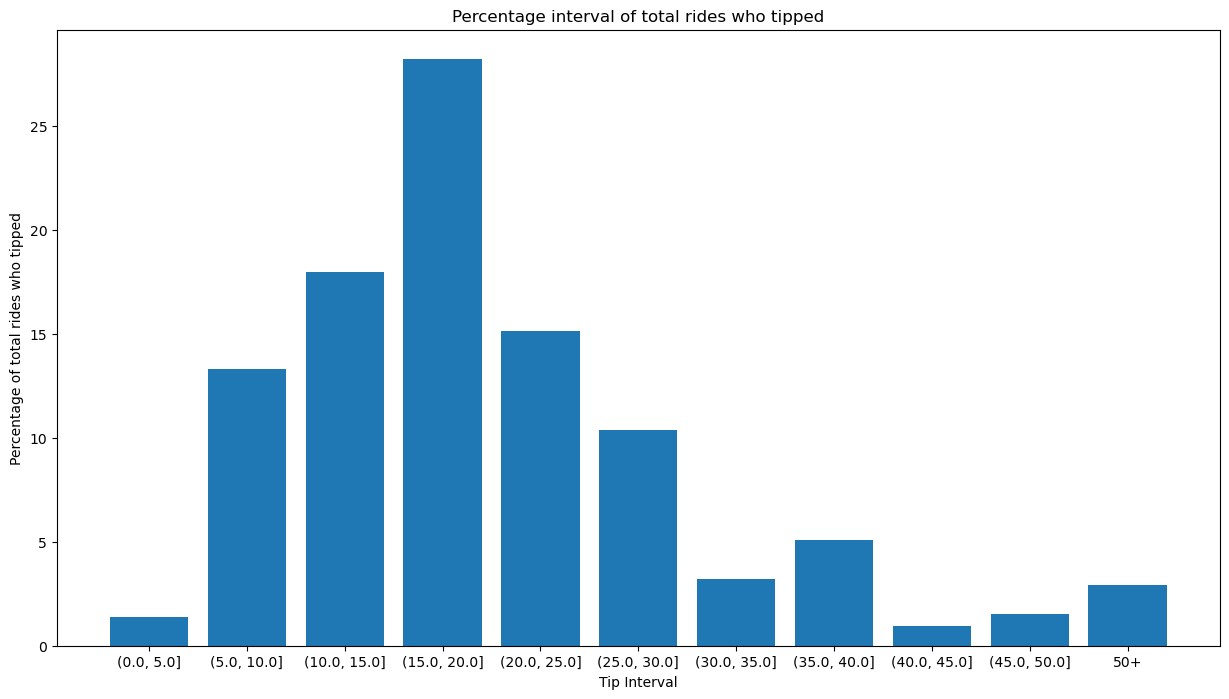

In [17]:
#Percentage of tipping interval in Chicago taxi data of the riders who tipped

plt.figure(figsize=(15, 8))

plt.bar(plot['index'][1:], (plot['Tip_percent_interval'][1:]/df[df['Tipped'] == True].shape[0])*100)
plt.ylabel('Percentage of total rides who tipped')
plt.xlabel('Tip Interval')
plt.title('Percentage interval of total rides who tipped')
plt.show()

### Tipping in shared vs non-shared trip (Hypothesis is that tipping in non-shared should be high)

In [18]:
(df[df['Shared Trip Authorized']== True].shape[0]/df.shape[0] )*100 # Only 10.709% actually carpoolled in the last 3 years

#There was no carpooling from march 2020 to june 2022

10.709417174870921

In [19]:
(df[(df['Shared Trip Authorized']== True) & (df['Tipped'] == True)].shape[0]/df[df['Tipped'] == True].shape[0])*100 # Only 10.709% actually carpoolled in the last 3 years

#There was no carpooling from march 2020 to june 2022

4.75088660150506

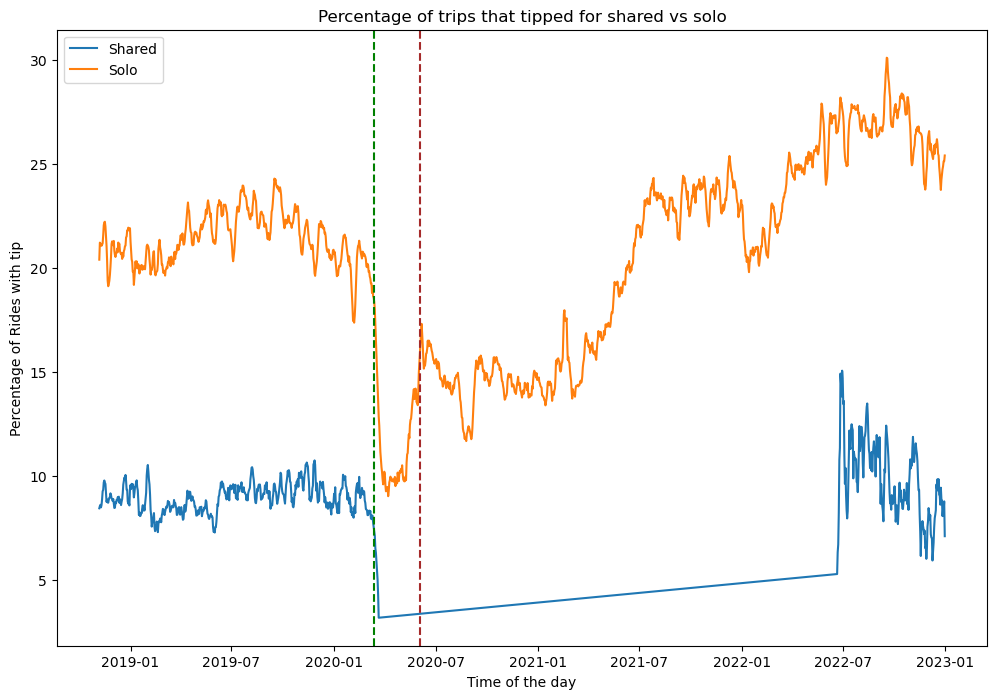

In [20]:
# shared vs solo over time

plt.figure(figsize=(12, 8))


shared = df[df['Shared Trip Authorized']== True].groupby([df.Date2])['Tipped'].mean()
shared = shared[shared<0.4]

rolling_avg_shared = shared.rolling(window=7).mean()

solo = df[df['Shared Trip Authorized']== False].groupby([df.Date2])['Tipped'].mean()

rolling_avg_solo = solo.rolling(window=7).mean()

plt.plot(shared.index, rolling_avg_shared*100, label = 'Shared')
plt.plot(solo.index, rolling_avg_solo*100, label = 'Solo')

plt.xlabel('Time of the day')
plt.ylabel('Percentage of Rides with tip')
plt.legend()
plt.title('Percentage of trips that tipped for shared vs solo')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')


# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')


In [21]:
df_shared = df[df['Shared Trip Authorized']== True]
df_solo = df[df['Shared Trip Authorized']== False]

In [22]:
plot_shared = df_shared['Tip_percent_interval'].value_counts().reset_index()
plot_shared = plot_shared.sort_values('index').reset_index(drop=True)
plot_shared['index'] = plot_shared['index'].astype(str)
plot_shared = plot_shared.replace("(50.0, 746.269]", "50+")
plot_shared = plot_shared.replace("(-1.0, 0.0]", "0")

plot_solo = df_solo['Tip_percent_interval'].value_counts().reset_index()
plot_solo = plot_solo.sort_values('index').reset_index(drop=True)
plot_solo['index'] = plot_solo['index'].astype(str)
plot_solo = plot_solo.replace("(50.0, 746.269]", "50+")
plot_solo = plot_solo.replace("(-1.0, 0.0]", "0")

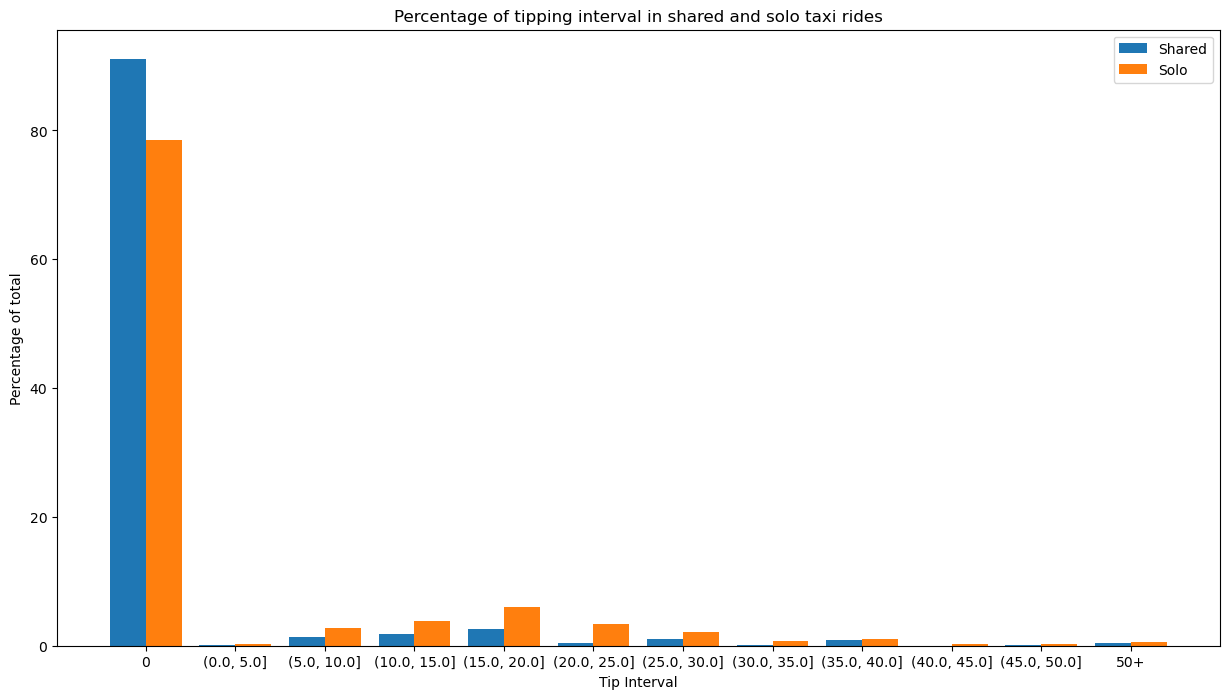

In [23]:
#Percentage of tipping interval in Chicago taxi data of passengers who shared taxi & who travelled solo

plt.figure(figsize=(15, 8))

# Set the x-coordinates for the bars
x_shared = np.arange(len(plot_shared))
x_solo = np.arange(len(plot_solo)) + 0.4

plt.bar(x_shared, (plot_shared['Tip_percent_interval']/df_shared.shape[0])*100, width=0.4, label='Shared')
plt.bar(x_solo, (plot_solo['Tip_percent_interval']/df_solo.shape[0])*100, width=0.4, label='Solo')
plt.ylabel('Percentage of total')
plt.xlabel('Tip Interval')

plt.xticks(x_solo -0.2, plot_solo['index'])

plt.legend()
plt.title('Percentage of tipping interval in shared and solo taxi rides')
plt.show()

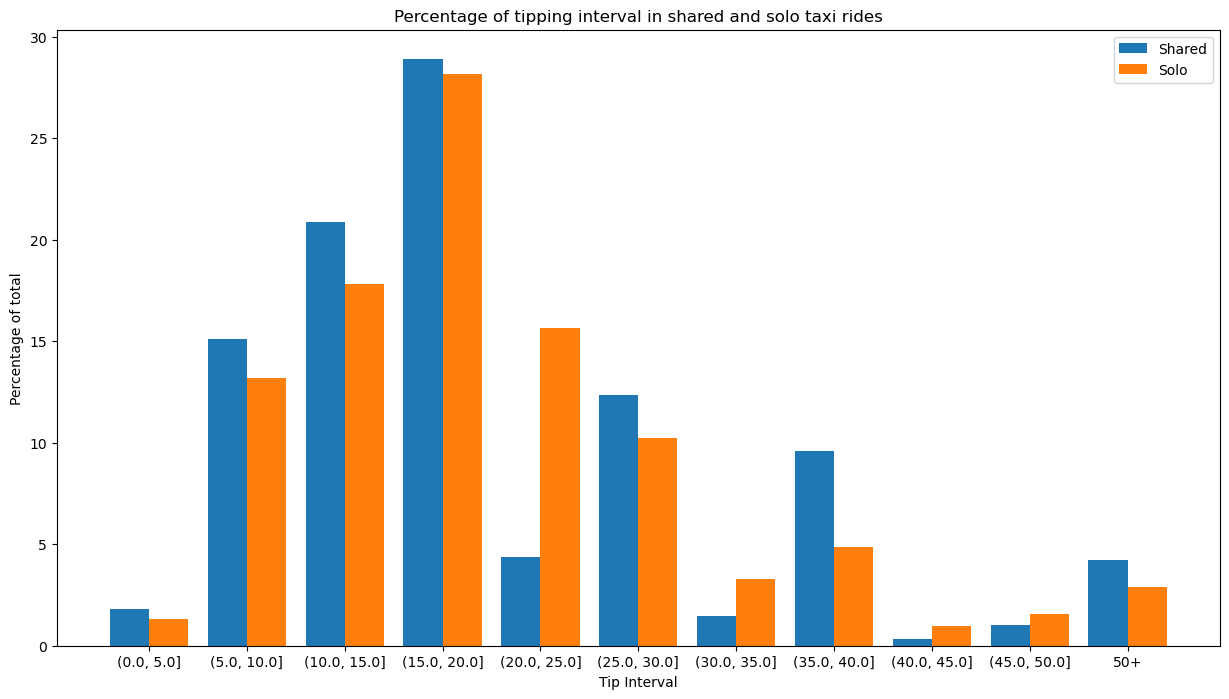

In [24]:
#Percentage of tipping interval in Chicago taxi data of passengers who shared taxi & who travelled solo of the riders who tipped

plt.figure(figsize=(15, 8))

# Set the x-coordinates for the bars
x_shared = np.arange(len(plot_shared)-1)
x_solo = np.arange(len(plot_solo)-1) + 0.4

plt.bar(x_shared, (plot_shared['Tip_percent_interval'][1:]/df_shared[df_shared['Tipped'] == True].shape[0])*100, width=0.4, label='Shared')
plt.bar(x_solo, (plot_solo['Tip_percent_interval'][1:]/df_solo[df_solo['Tipped'] == True].shape[0])*100, width=0.4, label='Solo')
plt.ylabel('Percentage of total')
plt.xlabel('Tip Interval')

plt.xticks(x_solo -0.2, plot_solo['index'][1:])

plt.legend()
plt.title('Percentage of tipping interval in shared and solo taxi rides')
plt.show()

In [25]:
# Create a mean for tip percentage
grouped_mean_shared = df_shared.groupby([df_shared.Date2]).mean()
grouped_sum_shared = df_shared.groupby([df_shared.Date2]).sum()
rolling_avg_shared = grouped_mean_shared.rolling(window=7).mean()
rolling_sum_shared = grouped_sum_shared.rolling(window=7).mean()
rolling_avg_shared =rolling_avg_shared[rolling_avg_shared['Tip_percent_PerRide']<10]

# Create a mean for tip percentage
grouped_mean_solo = df_solo.groupby([df_solo.Date2]).mean()
grouped_sum_solo = df_solo.groupby([df_solo.Date2]).sum()
rolling_avg_solo = grouped_mean_solo.rolling(window=7).mean()
rolling_sum_solo = grouped_sum_solo.rolling(window=7).mean()

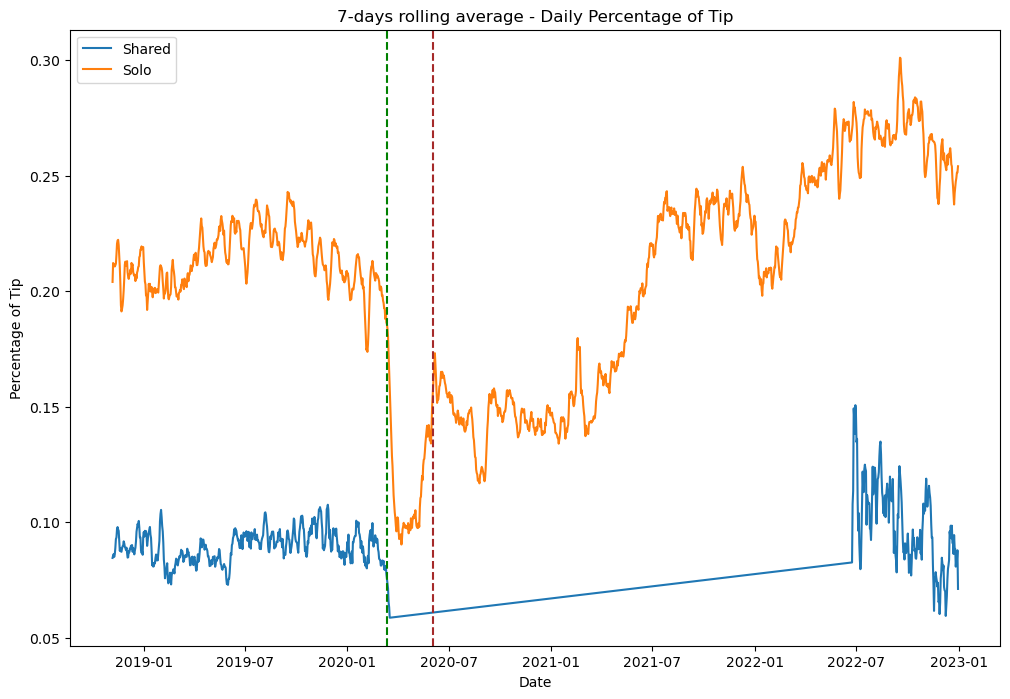

In [26]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(rolling_avg_shared.index, rolling_avg_shared['Tipped'],label = 'Shared')
plt.plot(rolling_avg_solo.index, rolling_avg_solo['Tipped'],label = 'Solo')


plt.xlabel('Date')
plt.ylabel('Percentage of Rides that Tipped')
plt.title('7-days rolling average - Daily Percentage of Tip')
plt.legend()


# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')


Text(2020-06-13 00:00:00, 4.5, 'Chicago COVID-19 Reopening')

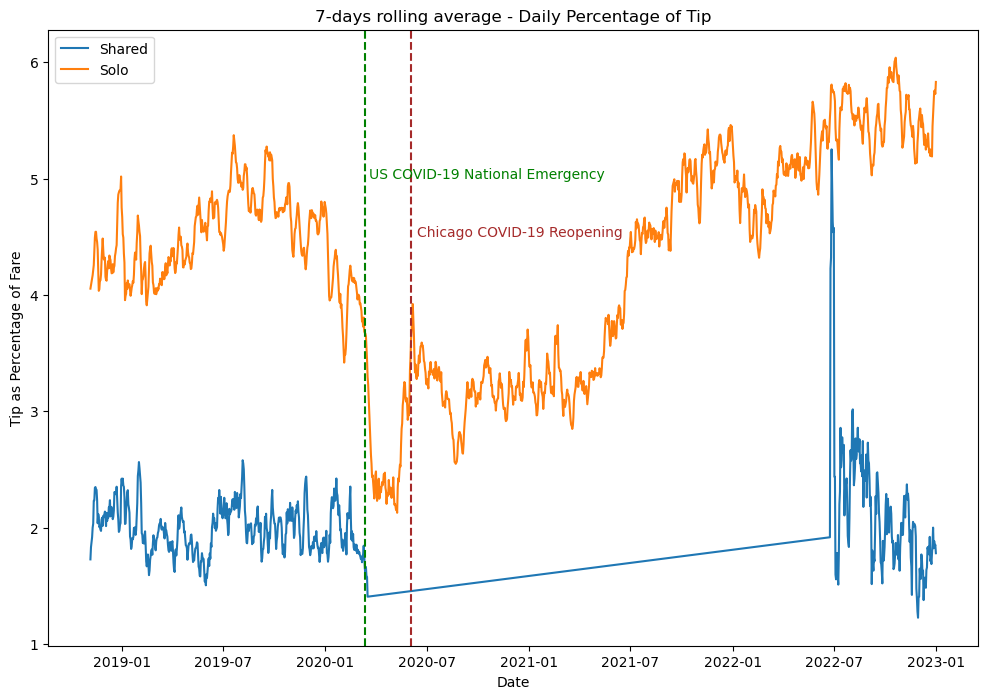

In [27]:
# Non rolling average plot
# Rolling average of tip as Percentage of Fare
plt.figure(figsize=(12, 8))

plt.plot(rolling_avg_shared.index, rolling_avg_shared['Tip_percent_PerRide'],label = 'Shared')
plt.plot(rolling_avg_solo.index, rolling_avg_solo['Tip_percent_PerRide'],label = 'Solo')

plt.xlabel('Date')
plt.ylabel('Tip as Percentage of Fare')
plt.title('7-days rolling average - Daily Percentage of Tip')
plt.legend()


# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 5, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 4.5, 'Chicago COVID-19 Reopening', color = 'brown' )

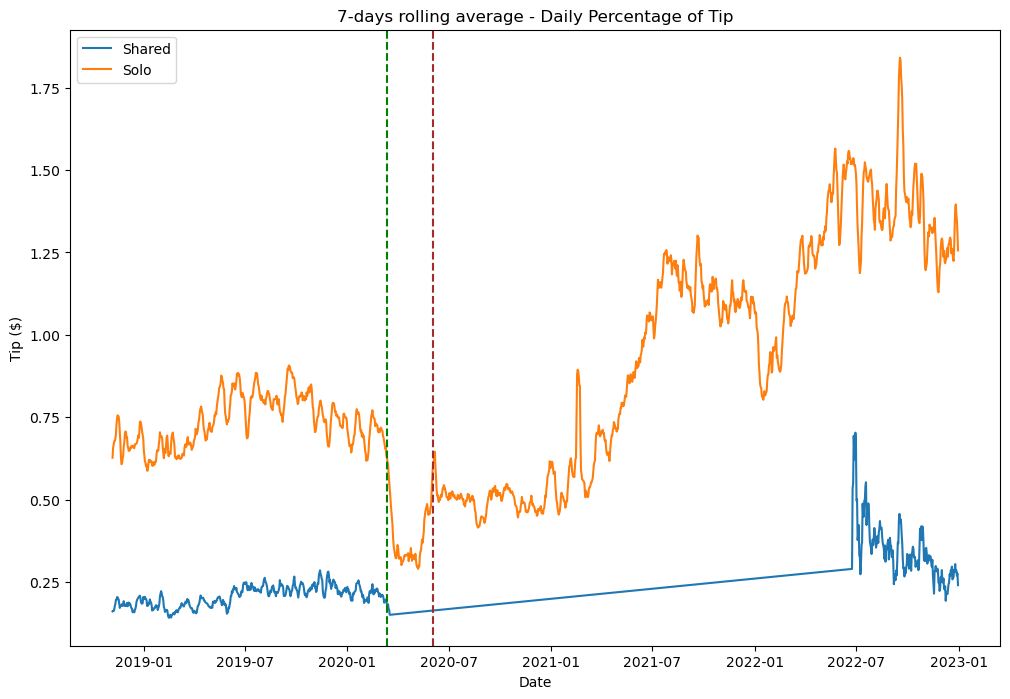

In [28]:
# Ammount of tip instead of percentage:
# Rolling average plot
# Rolling average of tip amount
plt.figure(figsize=(12, 8))

plt.plot(rolling_avg_shared.index, rolling_avg_shared['Tip'],label = 'Shared')
plt.plot(rolling_avg_solo.index, rolling_avg_solo['Tip'],label = 'Solo')


plt.xlabel('Date')
plt.ylabel('Tip ($)')
plt.title('7-days rolling average - Daily Percentage of Tip')
plt.legend()


# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')


### Tipping as per traffic level (Used proxy of miles/time for traffic condition)

1. Considering Average speed as 36 mph (0.001 miles per second)
2. Removed entries with speed greater than 144 mph

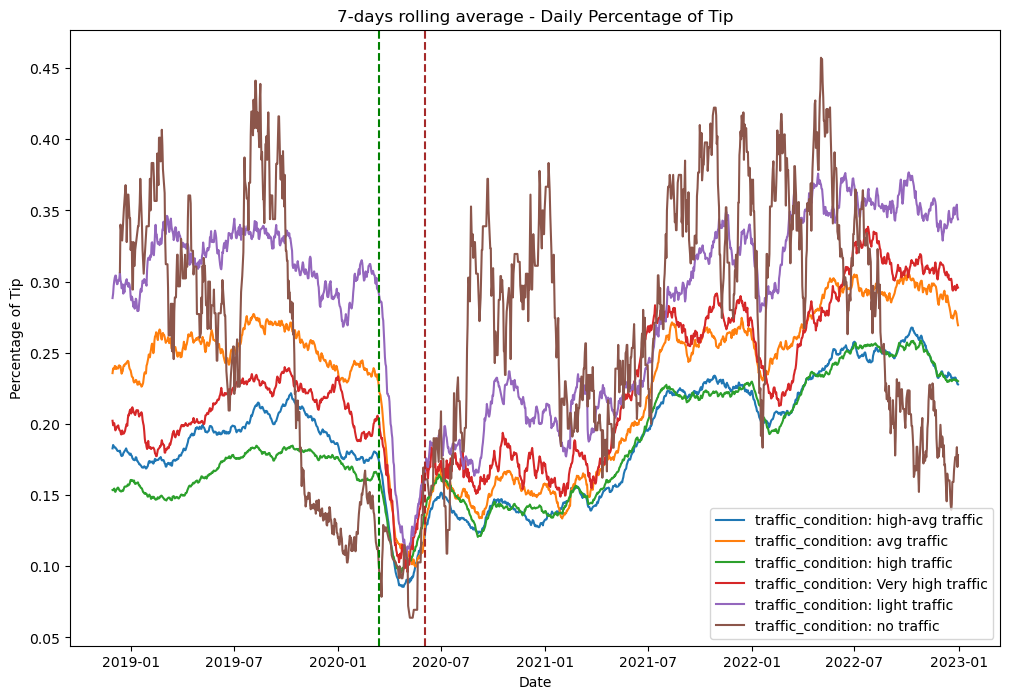

In [29]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

for i in df.traffic_condition_interval.unique(): 
    grouped_mean = df[df['traffic_condition_interval'] == i].groupby([df.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=30).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tipped'], label = f'traffic_condition: {i}')

plt.xlabel('Date')
plt.ylabel('Percentage of Tip')
plt.title('7-days rolling average - Daily Percentage of Tip')
plt.legend()

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')

Text(2020-06-13 00:00:00, 4.5, 'Chicago COVID-19 Reopening')

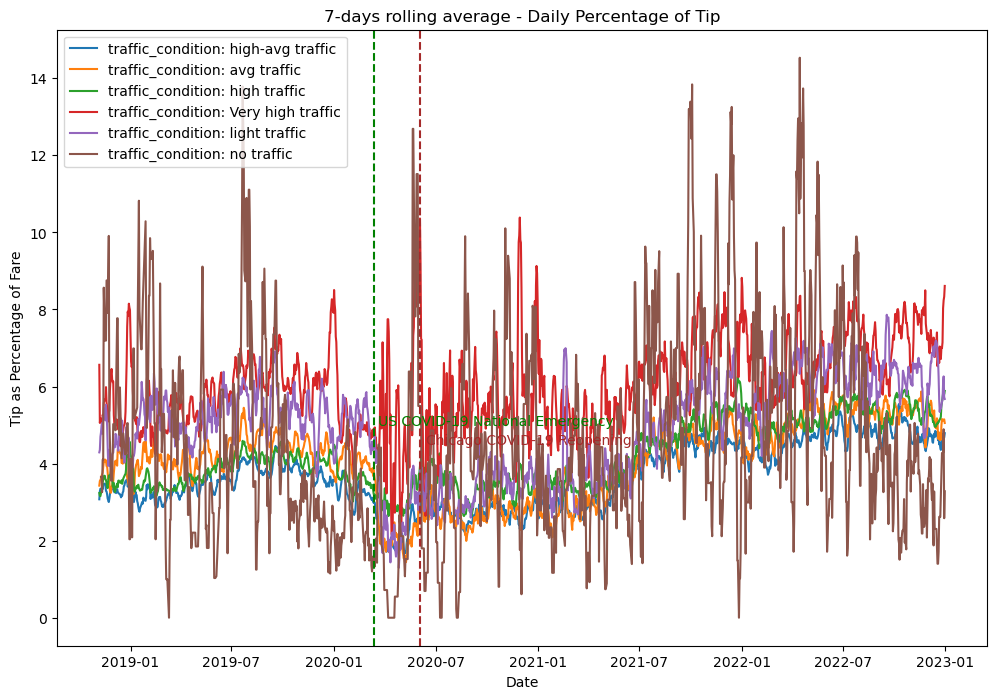

In [30]:
# Non rolling average plot
# Rolling average of tip as Percentage of Fare
plt.figure(figsize=(12, 8))

for i in df.traffic_condition_interval.unique(): 
    grouped_mean = df[df['traffic_condition_interval'] == i].groupby([df.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=7).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tip_percent_PerRide'], label = f'traffic_condition: {i}')

plt.xlabel('Date')
plt.ylabel('Tip as Percentage of Fare')
plt.title('7-days rolling average - Daily Percentage of Tip')
plt.legend()


# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 5, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 4.5, 'Chicago COVID-19 Reopening', color = 'brown' )

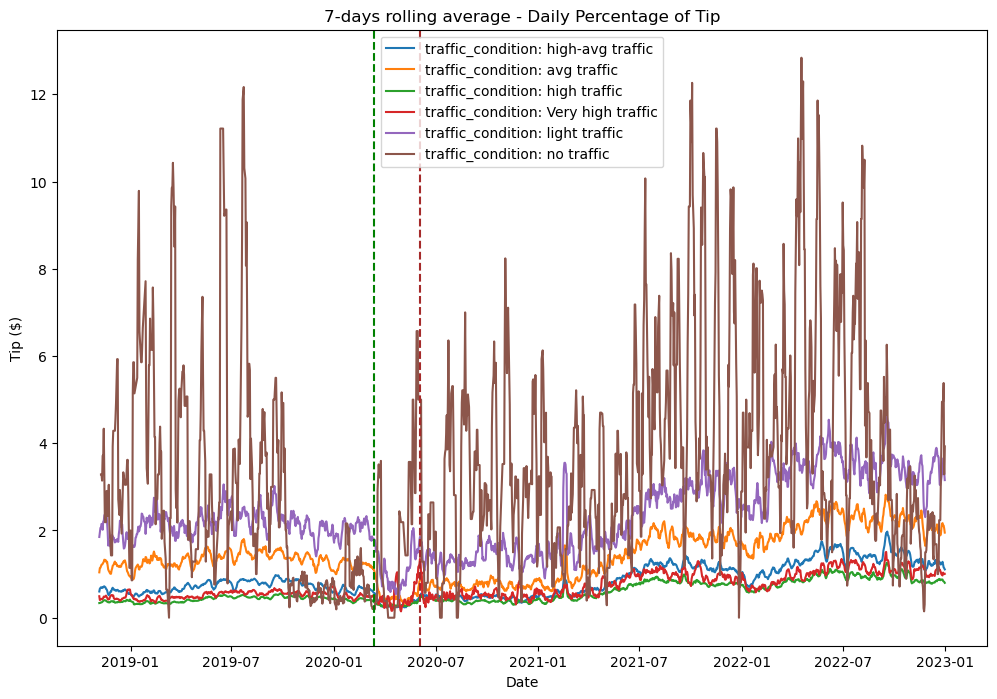

In [31]:
# Ammount of tip instead of percentage:
# Rolling average plot
# Rolling average of tip amount
plt.figure(figsize=(12, 8))


for i in df.traffic_condition_interval.unique(): 
    grouped_mean = df[df['traffic_condition_interval'] == i].groupby([df.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=7).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tip'], label = f'traffic_condition: {i}')

plt.xlabel('Date')
plt.ylabel('Tip ($)')
plt.title('7-days rolling average - Daily Percentage of Tip')
plt.legend()


# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')

### shared vs solo and traffic condition/avg speed

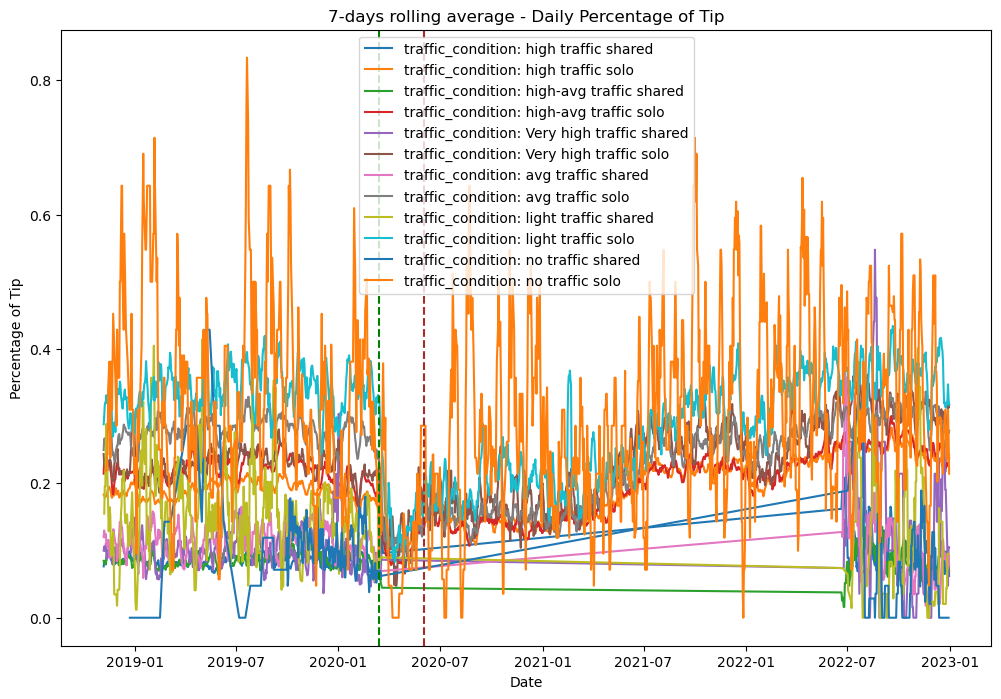

In [32]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

for i in df_shared.traffic_condition_interval.unique(): 
    grouped_mean = df_shared[df_shared['traffic_condition_interval'] == i].groupby([df_shared.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=7).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tipped'], label = f'traffic_condition: {i} shared')
 
    grouped_mean = df_solo[df_solo['traffic_condition_interval'] == i].groupby([df_solo.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=7).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tipped'], label = f'traffic_condition: {i} solo')

plt.xlabel('Date')
plt.ylabel('Percentage of Tip')
plt.title('7-days rolling average - Daily Percentage of Tip')
plt.legend()

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')

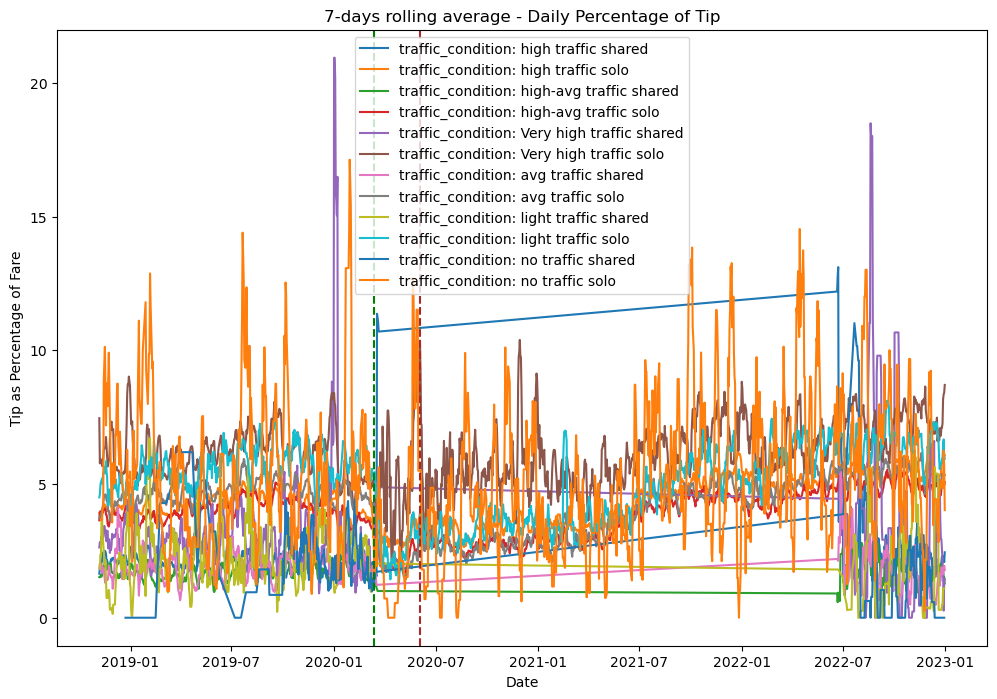

In [33]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

for i in df_shared.traffic_condition_interval.unique(): 
    grouped_mean = df_shared[df_shared['traffic_condition_interval'] == i].groupby([df_shared.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=7).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tip_percent_PerRide'], label = f'traffic_condition: {i} shared')

    grouped_mean = df_solo[df_solo['traffic_condition_interval'] == i].groupby([df_solo.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=7).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tip_percent_PerRide'], label = f'traffic_condition: {i} solo')

plt.xlabel('Date')
plt.ylabel('Tip as Percentage of Fare')
plt.title('7-days rolling average - Daily Percentage of Tip')
plt.legend()

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')

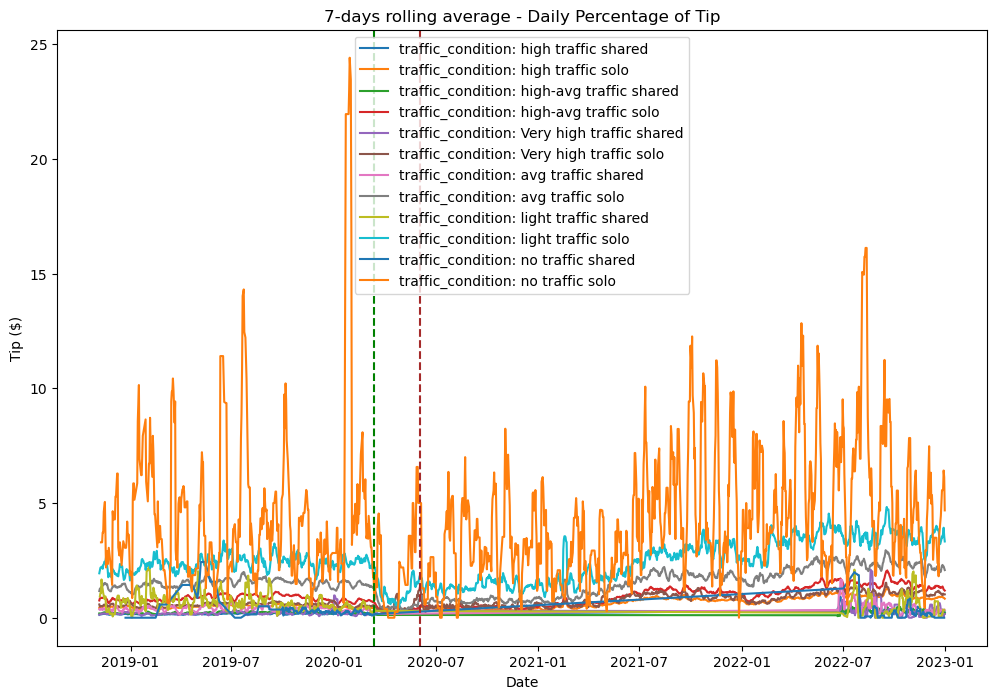

In [34]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

for i in df_shared.traffic_condition_interval.unique(): 
    grouped_mean = df_shared[df_shared['traffic_condition_interval'] == i].groupby([df_shared.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=7).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tip'], label = f'traffic_condition: {i} shared')

    grouped_mean = df_solo[df_solo['traffic_condition_interval'] == i].groupby([df_solo.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=7).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tip'], label = f'traffic_condition: {i} solo')

plt.xlabel('Date')
plt.ylabel('Tip ($)')
plt.title('7-days rolling average - Daily Percentage of Tip')
plt.legend()

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')